# Word embeddings

### Resources

- Word2vec (Mikolov et al., 2013): https://code.google.com/archive/p/word2vec/
- Fasttext: http://www.fasttext.cc/ (+sub-word information, +multilingual)
- Glove (Pennington, Socher, Manning, 2014): http://nlp.stanford.edu/projects/glove/



Gensim documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

Embeddings visualizer: https://projector.tensorflow.org/


## Loading and using word embeddings

In [ ]:
import gensim


In [ ]:
# Show all available models in gensim-data
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "GloVe 25" embeddings
embeddings_twitter = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
print(len(embeddings.index2word))
print(len(embeddings_twitter.index2word))

999999
1193514


In [ ]:
embeddings.get_vector('cat')

array([ 4.7426e-02, -4.2203e-02,  2.8491e-02, -4.4481e-02, -2.6467e-02,
        3.3557e-02,  1.7173e-01, -1.4773e-01,  7.1133e-02,  3.8385e-02,
       -7.9921e-02, -1.3236e-03,  1.6185e-01, -1.6389e-01, -6.5456e-02,
        2.7030e-02,  1.2193e-01, -7.1632e-02,  7.9642e-02, -1.4602e-01,
        1.0369e-02, -1.0468e-01,  3.6734e-02,  7.9116e-02,  1.8241e-01,
       -2.4902e-03,  1.3818e-02,  1.2378e-01,  1.7348e-04,  1.6646e-02,
       -1.3513e-02, -7.5532e-02,  1.0060e-01,  7.1226e-02, -2.7468e-02,
       -7.8517e-02,  3.3769e-02, -1.6082e-01, -2.2747e-02, -1.3238e-01,
        1.1198e-02, -1.2838e-01, -5.8910e-02, -5.1399e-02,  3.9177e-02,
        5.8243e-02,  2.2071e-02,  7.1876e-02,  2.8166e-02, -1.8918e-02,
        3.4445e-02,  1.5664e-01,  6.9836e-02, -2.0858e-01,  2.4413e-03,
       -8.9110e-02, -6.0705e-02,  6.5106e-02, -8.3036e-02,  1.7491e-02,
       -3.4527e-02, -2.5026e-01,  1.8777e-01, -3.6235e-02,  1.2452e-01,
        2.4356e-02, -4.4517e-03,  5.5572e-02, -8.6161e-03, -1.61

In [ ]:
embeddings.most_similar('cat')

[('cats', 0.8368596434593201),
 ('housecat', 0.7674711346626282),
 ('-cat', 0.7602992057800293),
 ('dog', 0.7502298355102539),
 ('kitten', 0.7480818033218384),
 ('feline', 0.7353992462158203),
 ('super-cat', 0.7305205464363098),
 ('supercat', 0.7163283824920654),
 ('pet', 0.7090284824371338),
 ('moggy', 0.7057286500930786)]

In [ ]:
embeddings_twitter.most_similar('cat')

[('dog', 0.9590819478034973),
 ('monkey', 0.9203578233718872),
 ('bear', 0.9143137335777283),
 ('pet', 0.9108031392097473),
 ('girl', 0.8880630135536194),
 ('horse', 0.8872727155685425),
 ('kitty', 0.8870542049407959),
 ('puppy', 0.886769711971283),
 ('hot', 0.8865255117416382),
 ('lady', 0.8845518827438354)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    embeddings.get_vector('cat').reshape(1,-1), 
    embeddings.get_vector('kitten').reshape(1,-1)
    )[0][0]

0.7480817

In [ ]:
embeddings.similarity('cat', 'kitten')

0.74808174

In [ ]:
embeddings.similarity('cat', 'puppy')

0.6651119

In [ ]:
embeddings.closer_than('cat', 'puppy')

['dog',
 'cats',
 'Cat',
 'pet',
 'kitten',
 'feline',
 'kitty',
 'subcat',
 'felines',
 'beagle',
 'sub-cat',
 'tomcat',
 'moggy',
 'housecat',
 'supercat',
 'moggie',
 'she-cat',
 're-cat',
 'cat-',
 'kittypet',
 'super-cat',
 '-cat']

#### Synonymy vs relatedness

In [ ]:
embeddings.similarity('uncle', 'sister')

0.7174434

In [ ]:
embeddings.similarity('good', 'bad')

0.8503089

In [ ]:
embeddings.similarity('Monday', 'Sunday')

0.85126

#### Word analogies

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828967213630676),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654636740684509),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.8604660630226135)]

In [ ]:
# Rome - Italy + France
embeddings.most_similar_cosmul(positive=['Rome', 'France'], negative=['Italy'])

[('Paris', 0.9433913826942444),
 ('Meaux', 0.8968006372451782),
 ('Avignon', 0.8785353302955627),
 ('Saint-Denis', 0.8744451403617859),
 ('Rouen', 0.8729321956634521),
 ('Lyon', 0.8724958300590515),
 ('Louville', 0.8714753985404968),
 ('Toulouse', 0.8713098168373108),
 ('Beauvais', 0.8704253435134888),
 ('Blois', 0.8698782920837402)]

In [ ]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Romanian'], negative=['Italian'])

[('polenta', 0.7852737307548523),
 ('bulgar', 0.7823465466499329),
 ('bulgur', 0.769961953163147),
 ('babka', 0.7660169005393982),
 ('soup', 0.7643554210662842),
 ('mămăligă', 0.7633044719696045),
 ('cereal', 0.7588523626327515),
 ('pelmeni', 0.758571445941925),
 ('masa', 0.7559653520584106),
 ('tin', 0.7554839253425598)]

In [ ]:
# cat - dog + puppy
embeddings.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9267359972000122),
 ('kitty', 0.8846306204795837),
 ('cats', 0.8722013831138611),
 ('kittens', 0.8703644871711731),
 ('kitties', 0.8619921803474426),
 ('kitteh', 0.8562358021736145),
 ('housecat', 0.855234682559967),
 ('moggy', 0.8512866497039795),
 ('-cat', 0.8492761850357056),
 ('moggie', 0.847593367099762)]

In [ ]:
# green - blue + red
embeddings.most_similar_cosmul(positive=['purple', 'yellow'], negative=['blue'])

[('orange', 0.9281181693077087),
 ('green-yellow', 0.9220715761184692),
 ('pink', 0.9197202920913696),
 ('orange-yellow', 0.9192143082618713),
 ('white-yellow', 0.9170408248901367),
 ('red-yellow', 0.9141272306442261),
 ('purple-blue', 0.910987913608551),
 ('purple-red', 0.9094883799552917),
 ('yellow-orange', 0.9063597321510315),
 ('yellow-green', 0.9045568704605103)]

In [ ]:
embeddings.doesnt_match((('dog', 'cat', 'mouse', 'cake')))

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cake'

## Training embeddings

In [ ]:
gensim.models.Word2Vec(sentences=None, corpus_file=None, 
                                size=100, alpha=0.025, window=5, min_count=5, 
                                max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, 
                                negative=5, ns_exponent=0.75, cbow_mean=1, null_word=0, trim_rule=None, 
                                sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(),
                                max_final_vocab=None)


In [ ]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = gensim.models.Word2Vec(sentences, min_count=1)  

In [ ]:
model.similarity('dog', 'cat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.037318133

In [ ]:
model.wv.get_vector('cat')

array([-2.6928321e-03, -3.8474682e-03, -3.7516716e-03,  7.5062196e-04,
       -2.4116486e-03, -1.9759606e-03,  3.8492146e-03,  6.0895650e-04,
        6.4438966e-05, -1.0920650e-03,  1.2815873e-03,  4.8375195e-03,
        1.4040100e-03, -3.0309185e-03,  2.0494496e-03,  5.2425399e-04,
        2.0079808e-03,  2.2230230e-03, -4.7189947e-03, -3.3395921e-03,
        2.9082864e-03, -4.5171455e-03,  3.4658571e-03,  5.6375057e-04,
        1.5796941e-04,  7.6887163e-04,  9.2919770e-04,  4.1730446e-03,
       -3.5849444e-03,  3.3028871e-05, -4.7502460e-04,  4.6161083e-03,
       -6.6772063e-04,  2.1898779e-03, -4.2802212e-03,  2.0621959e-03,
        4.4957432e-03, -1.2359846e-03, -1.7726253e-03, -1.8542126e-03,
        3.1596615e-03, -4.4035637e-03, -4.1736308e-03, -1.5256688e-03,
       -1.5860468e-03, -4.4472441e-03, -4.1674552e-03, -4.6395059e-03,
       -3.2609007e-03, -2.2880691e-03,  4.8373239e-03, -2.8637357e-03,
       -4.3083797e-03,  1.3348568e-04,  1.0028776e-03,  3.5524386e-04,
      

In [ ]:
model.wv.save_word2vec_format("cats_model.bin")

In [ ]:
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("cats_model.bin")

In [ ]:
loaded_model.vocab

{'cat': <gensim.models.keyedvectors.Vocab at 0x7f90140213d0>,
 'dog': <gensim.models.keyedvectors.Vocab at 0x7f9014021a50>,
 'meow': <gensim.models.keyedvectors.Vocab at 0x7f9013ffdf10>,
 'say': <gensim.models.keyedvectors.Vocab at 0x7f9013ffd650>,
 'woof': <gensim.models.keyedvectors.Vocab at 0x7f9013ffdcd0>}

In [ ]:
loaded_model.similarity('dog', 'cat')

-0.037318133

# Exercises (1p)

1. Find a sentence in a news article online and store it in a python variable. Lemmatize the text. Compute the similarity between each original word in the text and its lemma.

In [6]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.downloader

text = "The Environment Ministry’s draft notification to regulate the use of membrane-based water purification systems primarily concerns the manufacturers of reverse osmosis (RO) water filters but effectively bars domestic users from installing RO systems. "

embeddings_twitter = gensim.downloader.load('glove-twitter-25')
lemmatizer = WordNetLemmatizer()
words = nltk.word_tokenize(text)

for word in words:
  if word in embeddings_twitter:
    similarity = embeddings_twitter.similarity(word, lemmatizer.lemmatize(word))
    print("WORD={}, LEMMATIZED WORD={}, SIMILARITY={}".format(word, lemmatizer.lemmatize(word), similarity))
    print()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
WORD=’, LEMMATIZED WORD=’, SIMILARITY=1.0

WORD=s, LEMMATIZED WORD=s, SIMILARITY=1.0

WORD=draft, LEMMATIZED WORD=draft, SIMILARITY=1.0

WORD=notification, LEMMATIZED WORD=notification, SIMILARITY=1.0

WORD=to, LEMMATIZED WORD=to, SIMILARITY=1.0

WORD=regulate, LEMMATIZED WORD=regulate, SIMILARITY=1.0

WORD=the, LEMMATIZED WORD=the, SIMILARITY=1.0000001192092896

WORD=use, LEMMATIZED WORD=use, SIMILARITY=1.0

WORD=of, LEMMATIZED WORD=of, SIMILARITY=1.0

WORD=water, LEMMATIZED WORD=water, SIMILARITY=1.0

WORD=purification, LEMMATIZED WORD=purification, SIMILARITY=1.0

WORD=systems, LEMMATIZED WORD=system, SIMILARITY=0.92103511095047

WORD=primarily, LEMMATIZED WORD=primarily, SIMILARITY=0.9999999403953552

WORD=concerns, LEMMATIZED WORD=concern, SIMILARITY=0.850144

2. Download the Sim-Lex dataset: https://fh295.github.io/simlex.html, containing word pairs and similarity scores for each pair. Compute the similarities between the word pairs using word embeddings and cosine-distance. Compute the Spearman Correlation between the obtained similarities and the similarities reported in the dataset (use the `Assoc(USF)` field in the `SimLex-999.txt` file). Ignore any words not found in the chosen embeddings space.

Note: you can access the file from the Colaboratory notebook by uploading it to session storage, using the lefthand button "Files" -> "Upload to session storage"

In [9]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr

cosine_sim = []
assoc_sim = []
 
data = pd.read_csv('SimLex-999.txt', delimiter='\t')
for _, line in data.iterrows():
  word1 = line['word1']
  word2 = line['word2']

  if word1 in embeddings_twitter and word2 in embeddings_twitter:
    emb1 = embeddings_twitter.get_vector(word1)
    emb2 = embeddings_twitter.get_vector(word2)
    similarity = cosine_similarity(emb1.reshape(1,-1), emb2.reshape(1,-1))[0][0]
    cosine_sim.append(similarity)
    assoc_sim.append(line['Assoc(USF)'])


coef, p = spearmanr(cosine_sim, assoc_sim)
print("Spearman Correlation: {}".format(coef))

Spearman Correlation: 0.2153530958579109


Compare two different embedding models, see which yields the higher correlation.

In [11]:
embeddings_twitter = gensim.downloader.load('glove-twitter-25')
embeddings_news = gensim.downloader.load('fasttext-wiki-news-subwords-300')

twitter_emb_sim = []
news_emb_sim = []
assoc_sim = []

for _, line in data.iterrows():
  word1 = line['word1']
  word2 = line['word2']

  if word1 in embeddings_twitter and word2 in embeddings_twitter:
    similarity_twitter = cosine_similarity(embeddings_twitter.get_vector(word1).reshape(1,-1), embeddings_twitter.get_vector(word2).reshape(1,-1))[0][0]
    similarity_news = cosine_similarity(embeddings_news.get_vector(word1).reshape(1,-1), embeddings_news.get_vector(word2).reshape(1,-1))[0][0]
    twitter_emb_sim.append(similarity_twitter)
    news_emb_sim.append(similarity_news)
    assoc_sim.append(line['Assoc(USF)'])


coef, p = spearmanr(twitter_emb_sim, assoc_sim)
print("Spearman Correlation Twitter - Assoc(USF): {}".format(coef))
coef, p = spearmanr(news_emb_sim, assoc_sim)
print("Spearman Correlation News - Assoc(USF): {}".format(coef))
coef, p = spearmanr(news_emb_sim, twitter_emb_sim)
print("Spearman Correlation News - Twotter: {}".format(coef))

Spearman Correlation Twitter - Assoc(USF): 0.2153530958579109
Spearman Correlation News - Assoc(USF): 0.439913167013458
Spearman Correlation News - Twotter: 0.46903905653807526


3. Take a paragraph from a corpus in NLTK. (e.g. the Brown corpus. Note: first you will need to download it using the downloader). Replace each word in the paragraph with its most similar word in embedding space. 

Take a tweet from the web and replace each word with its most similar word in embedding space, using embeddings trained on Twitter data.

Do you get a coherent text?

In [12]:
import nltk
nltk.download('brown')
from nltk.corpus import brown


text = ' '.join(brown.words()[:70])
words = nltk.word_tokenize(text)
new_text = ""
for word in words:
  if word in embeddings_news:
    most_similar = embeddings_news.most_similar(word)[0][0]
    new_text += most_similar + " "

#the new sentence doesn't make sense at all because the most similar word might be any type of POS
print(text)
print(new_text)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October
-The Fultonham County- Poobah Juryman says Monday An investigations Kira-Kira Atlantan 's--the not-so-recent secondary elections coproduced little evidences thaty ANY irregularity taken places ! -The juries futher says throughout term-paper revulsions thaty its City- Co-Executive Committtee - that have overall charges Kira-Kira its elections - deserve its praises both thank Kira-Kira its City- Kira-Kira Atlantan time--for its mannner throughout that its elections is condu

Try to first POS-tag the text and only replace nouns and adjectives with their most similar word in embedding space.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('averaged_perceptron_tagger')

wordsList = nltk.word_tokenize(text)
tagged = nltk.pos_tag(wordsList)
new_text = ""
for word, pos in tagged:
  if word in embeddings_news and pos in ('JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS'):
    most_similar = embeddings_news.most_similar(word)[0][0]
    new_text += most_similar + " "
  else:
    new_text += word + " "

print(text)
print(new_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October
The Fultonham County- Poobah Juryman said Monday an investigations of Atlantan 's not-so-recent secondary elections produced `` no evidences '' that any irregularity took places . The juries further said in term-paper revulsions that the City- Co-Executive Committtee , which had overall charges of the elections , `` deserves the praises and thank of the City- of Atlantan '' for the mannne

4. Open a news website and find two articles on two different topics. Extract pairs of sentences from the two articles:

  a. two sentences from the first article

  b. two sentences from the second article

  c. one sentence from the first and one sentence from the second

Compute a semantic representation of each extracted sentence by averaging embeddings for words in the sentence.

Now compute and compare similarities between the obtained representations for sentences in each pair: a, b and c. Which are the most similar?

In [15]:
import numpy as np

first_article_sentence1 = 'Cream sugar and butter together in a mixing bowl. Add eggs, one at a time, beating briefly after each addition. Stir in vanilla.'
first_article_sentence2 = 'Combine flour and baking powder in a separate bowl. Add to the wet ingredients and mix well. '

second_article_sentence1 = 'Ukraine said Medvedchuk escaped house arrest three days after Russia started its invasion of Ukraine'
second_article_sentence2 = 'The most democratic president of modern Ukraine has taken another step towards the western ideals of democracy'


def get_representation(sentence, embeddings):
  words = nltk.word_tokenize(sentence)
  emb = np.zeros(300)
  no_words = 0
  for word in words:
    if word in embeddings:
      emb += embeddings.get_vector(word)
      no_words += 1
  emb /= no_words
  return emb

emb_first_article_sentence1 = get_representation(first_article_sentence1, embeddings_news)
emb_first_article_sentence2 = get_representation(first_article_sentence2, embeddings_news)

emb_second_article_sentence1 = get_representation(second_article_sentence1, embeddings_news)
emb_second_article_sentence2 = get_representation(second_article_sentence2, embeddings_news)

#a
sim1 = cosine_similarity(
    emb_first_article_sentence1.reshape(1,-1), 
    emb_first_article_sentence2.reshape(1,-1)
    )[0][0]

print("two sentences from the first article: {}".format(sim1))

#b
sim2 = cosine_similarity(
    emb_second_article_sentence1.reshape(1,-1), 
    emb_second_article_sentence2.reshape(1,-1)
    )[0][0]

print("two sentences from the second article: {}".format(sim2))

#c
sim3 = cosine_similarity(
    emb_first_article_sentence1.reshape(1,-1), 
    emb_second_article_sentence2.reshape(1,-1)
    )[0][0]

print("one sentence from the first and one sentence from the second: {}".format(sim3))

two sentences from the first article: 0.9043700369891601
two sentences from the second article: 0.8852234844823074
one sentence from the first and one sentence from the second: 0.589867892121771


Repeat the experiment after removing stopwords from each sentence.

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def get_representation(sentence, embeddings):
  stop_words = stopwords.words('english')

  words = nltk.word_tokenize(sentence)
  emb = np.zeros(300)
  no_words = 0
  for word in words:
    if word in embeddings and word not in stop_words:
      emb += embeddings.get_vector(word)
      no_words += 1
  emb /= no_words
  return emb

emb_first_article_sentence1 = get_representation(first_article_sentence1, embeddings_news)
emb_first_article_sentence2 = get_representation(first_article_sentence2, embeddings_news)

emb_second_article_sentence1 = get_representation(second_article_sentence1, embeddings_news)
emb_second_article_sentence2 = get_representation(second_article_sentence2, embeddings_news)

#a
sim1 = cosine_similarity(
    emb_first_article_sentence1.reshape(1,-1), 
    emb_first_article_sentence2.reshape(1,-1)
    )[0][0]

print("two sentences from the first article: {}".format(sim1))

#b
sim2 = cosine_similarity(
    emb_second_article_sentence1.reshape(1,-1), 
    emb_second_article_sentence2.reshape(1,-1)
    )[0][0]

print("two sentences from the second article: {}".format(sim2))

#c
sim3 = cosine_similarity(
    emb_first_article_sentence1.reshape(1,-1), 
    emb_second_article_sentence2.reshape(1,-1)
    )[0][0]

print("one sentence from the first and one sentence from the second: {}".format(sim3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
two sentences from the first article: 0.8660517996270988
two sentences from the second article: 0.8014101780245155
one sentence from the first and one sentence from the second: 0.46383268533117766


5. Perform PCA on a subset of word vectors that you expect to find interesting differences/similarities, and plot the first two components.


In [17]:
from sklearn.decomposition import PCA

In [22]:
import matplotlib.pyplot as plt

words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

words_emb = []
for word in words:
  if word in embeddings_news:
    emb = embeddings_news.get_vector(word)
    words_emb.append(emb)

words_emb = np.array(words_emb)

pca = PCA(n_components = 2)
pca.fit(words_emb)
reduced_emb = pca.transform(words_emb)

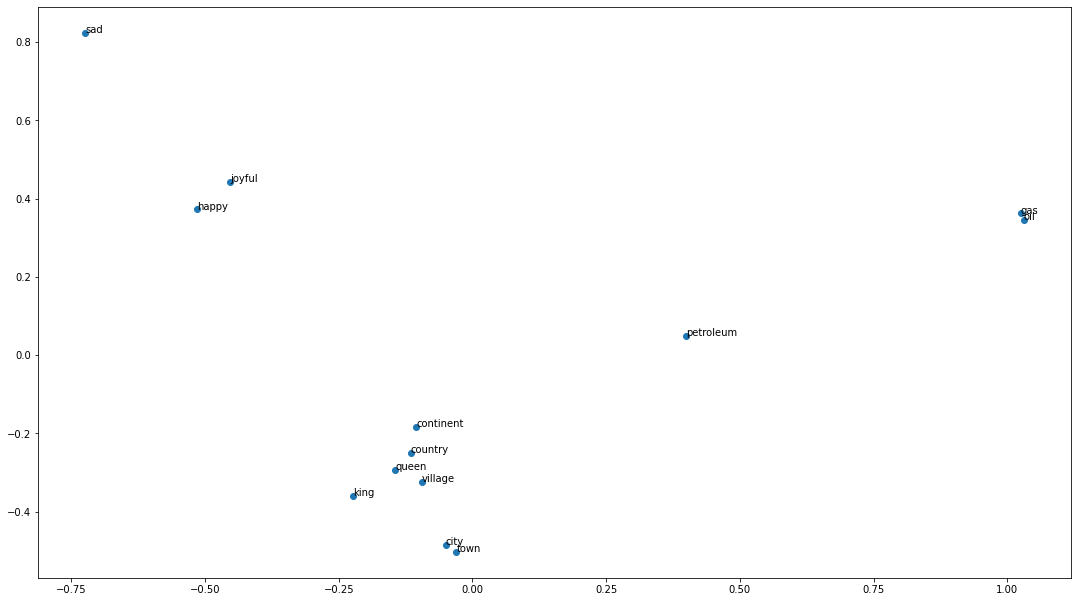

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(reduced_emb[:,0], reduced_emb[:,1])

for i in range(len(words)):
    ax.annotate(words[i], (reduced_emb[i][0], reduced_emb[i][1]))

6. Retrieve 10 movie reviews (or 50 sentences) from the IMDB reviews corpus in NLTK. Extract embedding vectors for each word, then perform k-means clustering using a similarity measure between the vectors (cosine similarity, or the similarity function provided by gensim), and different values for k (k=3,5,) to cluster similar words together. Ignore words which are not found in the embedding space. What clusters do you get?

In [38]:
from nltk.cluster import KMeansClusterer, cosine_distance


In [37]:
import nltk  
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews as mr

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
file_ids=mr.fileids()
reviews = []
for file in file_ids[:10]:
    review=str(mr.raw(file))
    reviews.append(review)

words = []
for review in reviews:
  review_words = nltk.word_tokenize(review)
  for word in review_words:
    if word not in words and word in embeddings_news:
      words.append(word)

emb_words = []
for word in words:
  if word in embeddings_news:
    emb = embeddings_news.get_vector(word)
    emb_words.append(emb)

emb_words = np.array(emb_words)
clusterer = KMeansClusterer(3, cosine_distance)
clusters = clusterer.cluster(emb_words, assign_clusters=True) 
print("Clustered:", words)
print("As:", clusters)

first_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 0:
    first_cluster.append(words[i])

second_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 1:
    second_cluster.append(words[i])

third_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 2:
    third_cluster.append(words[i])


print("First cluster: {}".format(first_cluster))
print("Second cluster: {}".format(second_cluster))
print("Third cluster: {}".format(third_cluster))

Clustered: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'s", 'deal', '?', 'watch', 'movie', 'sorta', 'find', 'out', 'critique', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'did', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'too', 'jumbled', 'starts', 

In [43]:
clusterer = KMeansClusterer(5, cosine_distance)
clusters = clusterer.cluster(emb_words, assign_clusters=True) 
print("Clustered:", words)
print("As:", clusters)

first_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 0:
    first_cluster.append(words[i])

second_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 1:
    second_cluster.append(words[i])

third_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 2:
    third_cluster.append(words[i])

forth_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 3:
    forth_cluster.append(words[i])


fifth_cluster = []
for i in range(len(clusters)):
  if clusters[i] == 4:
    fifth_cluster.append(words[i])


print("First cluster: {}".format(first_cluster))
print("Second cluster: {}".format(second_cluster))
print("Third cluster: {}".format(third_cluster))
print("Forth cluster: {}".format(forth_cluster))
print("Fifth cluster: {}".format(fifth_cluster))

Clustered: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'s", 'deal', '?', 'watch', 'movie', 'sorta', 'find', 'out', 'critique', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'did', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'too', 'jumbled', 'starts', 